# Academic Performance Prediction
***
## Table of Contents
1. [Introduction](#1-introduction)
1. [Loading Data](#2-loading-data)
1. [Exploratory Data Analysis](#3-exploratory-data-analysis)
    - [Numerical Variables](#numerical-variables)
    - [Categorical Variables](#categorical-variables)
        - [Q1. At which school do students achieve better grades ?](#q1-at-which-school-do-students-achieve-better-grades-)
        - [Q2. Does gender affect the final grades ?](#q2-does-gender-affect-the-final-grades-)
        - [Q3. Does motivation for higher education affect the final grades ?](#q3-does-motivation-for-higher-education-affect-the-final-grades-)
        - [Q4. Does students' residential area influence their final grades ?](#q4-does-students-residential-area-influence-their-final-grades-)
        - [Q5. Do students who attended nursery school achieve higher final grades than those who did not?](#q5-do-students-who-attended-nursery-school-achieve-higher-final-grades-than-those-who-did-not-)
        - [Q6. Does involvement in a romantic relationship influence students’ final grades ?](#q6-does-involvement-in-a-romantic-relationship-influence-students-final-grades-)
1. [Data Preprocessing](#4-data-preprocessing)
    - [Handling Categorical Features](#handling-categorical-features)
1. [Predictive Modelling](#5-predictive-modelling)
    - [Hyperparameter Tuning](#hyperparameter-tuning)
    - [Evaluation on Test Data](#evaluation-on-test-data)
1. [Conclusion](#6-conclusion)
***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 1. Introduction
This project focuses on developping and evaluating machine learning models capable of predicting students' final academic performance based on a range of demographic, social, and school-related features.

## 2. Loading Data

The dataset used in this project (retrieved from [UCI Machine Learning Repository - Student Performance](https://archive.ics.uci.edu/dataset/320/student+performance)) captures student achievement in secondary education from two Portuguese schools. It comprises a variety of attributes, including student grades in the Portuguese language, demographic information, social factors, and school-related features, collected through school reports and questionnaires.

Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades.

- **school**: Student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- **sex**: Student's sex (binary: 'F' - female or 'M' - male)
- **age**: Student's age (numeric: from 15 to 22)
- **address**: Student's home address type (binary: 'U' - urban or 'R' - rural)
- **famsize**: Family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- **Pstatus**: Parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- **Medu**: Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- **Fedu**: Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- **Mjob**: Mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **Fjob**: Father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **reason**: Reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- **guardian**: Student's guardian (nominal: 'mother', 'father' or 'other')
- **traveltime**: Home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- **studytime**: Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **failures**: Number of past class failures (numeric: n if 1<=n<3, else 4)
- **schoolsup**: Extra educational support (binary: yes or no)
- **famsup**: Family educational support (binary: yes or no)
- **paid**: Extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- **activities**: Extra-curricular activities (binary: yes or no)
- **nursery**: Attended nursery school (binary: yes or no)
- **higher**: Wants to take higher education (binary: yes or no)
- **internet**: Internet access at home (binary: yes or no)
- **romantic**: With a romantic relationship (binary: yes or no)
- **famrel**: Quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- **freetime**: Free time after school (numeric: from 1 - very low to 5 - very high)
- **goout**: Going out with friends (numeric: from 1 - very low to 5 - very high)
- **Dalc**: Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **Walc**: Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **health**: Current health status (numeric: from 1 - very bad to 5 - very good)
- **absences**: Number of school absences (numeric: from 0 to 93)
- **G1**: First period grade (numeric: from 0 to 20)
- **G2**: Second period grade (numeric: from 0 to 20)
- **G3**: Final grade (numeric: from 0 to 20, output target)

In [2]:
df = pd.read_csv("_datasets/student-por.csv", delimiter=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## 3. Exploratory Data Analysis

In [3]:
df.shape

(649, 33)

In [4]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


### Numerical Variables

In [7]:
def plot_correlation_matrix(
    df: pd.DataFrame, method: str = "pearson", annot=True
) -> None:
    num_columns = df.select_dtypes(include="number")
    plt.figure(figsize=(12, 8))
    corr = num_columns.corr(method=method)
    sns.heatmap(corr, annot=annot, fmt=".2f", cmap="coolwarm", square=True)
    plt.title(f"{method.title()} Correlation Matrix", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.yticks()
    plt.tight_layout()
    plt.show()

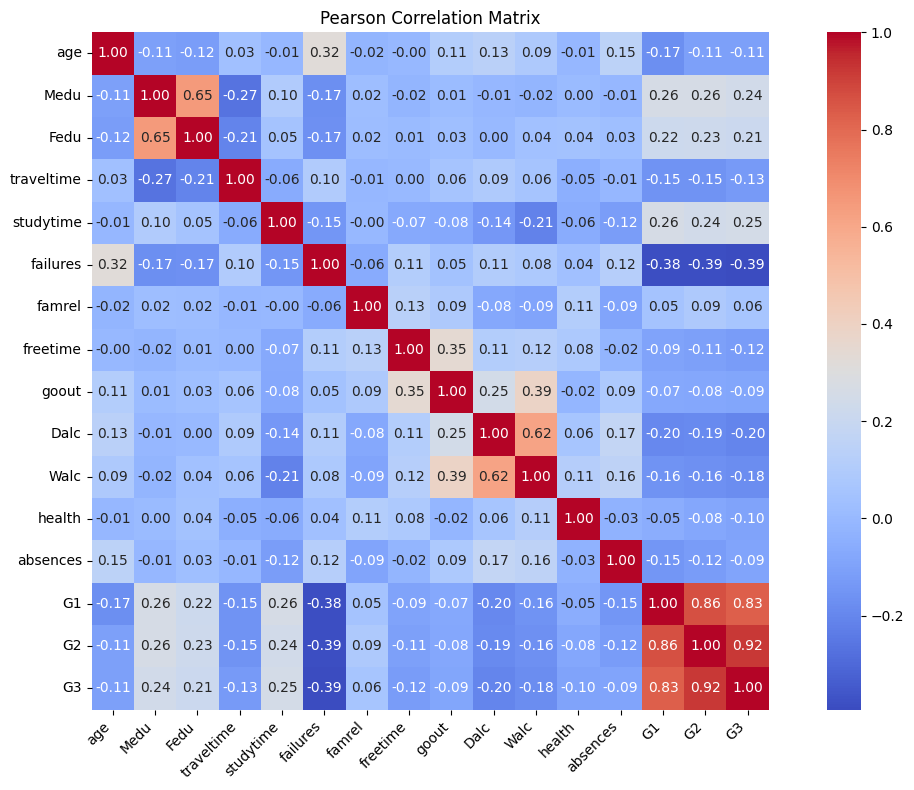

In [8]:
plot_correlation_matrix(df)

The correlation matrix indicates a slight negative correlation between `failures` and the grades `G1`, `G2`, and `G3`, suggesting that students with more past failures tend to achieve lower marks. The data also suggest that parental education levels, represented by `Medu` and `Fedu`, are positively correlated; well-educated individuals are more likely to marry partners with similarly high educational attainment. Furthermore, students who consume alcohol on weekdays are likely to go out and drink on weekends as well, and tend to spend less time studying.

### Categorical Variables
#### Q1. At which school do students achieve better grades ?

In [9]:
def plot_average_g3_comparison(data, x_label, custom_x_ticks=None):
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(
        data=data,
        x=x_label,
        y="G3",
        hue="school",
        palette="Set2",
        edgecolor="black",
    )
    for container in ax.containers:
        ax.bar_label(container, fontsize=12)

    if custom_x_ticks is not None:
        tick_positions = ax.get_xticks()
        ax.set_xticks(tick_positions)
        ax.set_xticklabels(custom_x_ticks)

    plt.title(f"Average G3 Score vs. {x_label}")
    plt.ylabel("Average Final Grade (G3)")
    plt.xlabel(x_label)
    plt.tight_layout()
    plt.show()

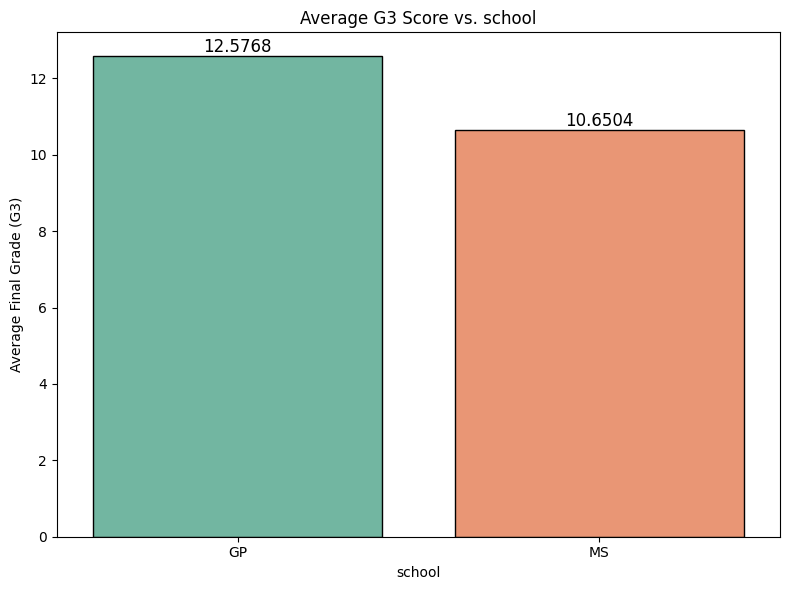

In [10]:
avg_g3_by_school = df.groupby(["school"])["G3"].mean().reset_index()
plot_average_g3_comparison(avg_g3_by_school, "school")

#### Q2. Does gender affect the final grades ?

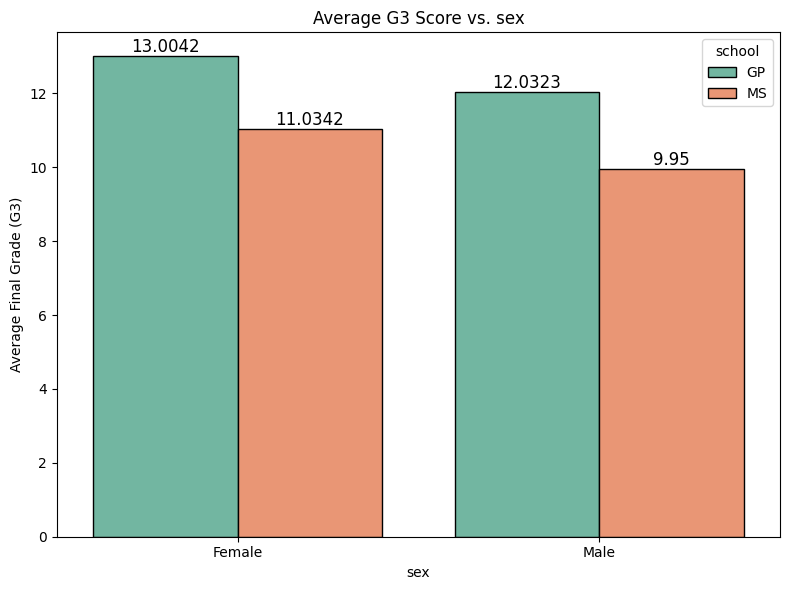

In [11]:
avg_g3_by_school_and_sex = df.groupby(["school", "sex"])["G3"].mean().reset_index()
avg_g3_by_school_and_sex
plot_average_g3_comparison(avg_g3_by_school_and_sex, "sex", ["Female", "Male"])

#### Q3. Does motivation for higher education affect the final grades ?

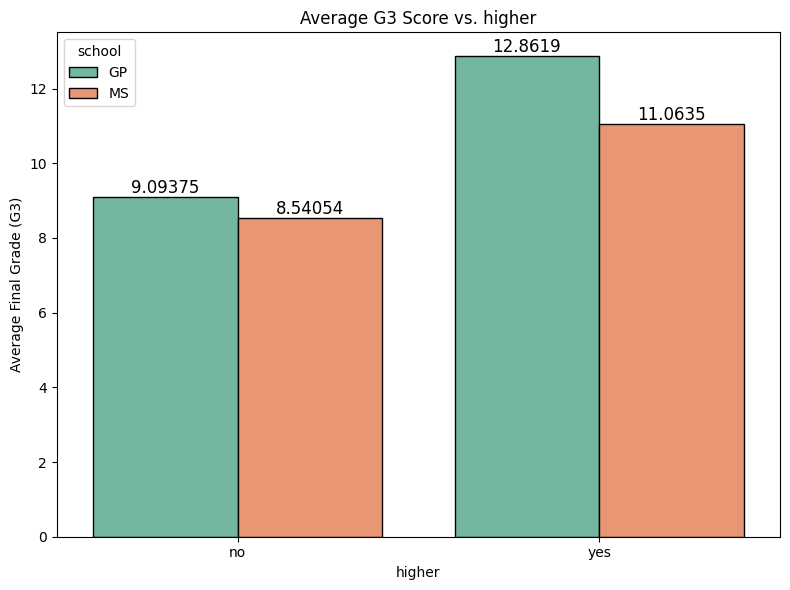

In [12]:
avg_g3_by_school_and_higher = (
    df.groupby(["school", "higher"])["G3"].mean().reset_index()
)
avg_g3_by_school_and_higher
plot_average_g3_comparison(avg_g3_by_school_and_higher, "higher")

#### Q4. Does students' residential area influence their final grades ?

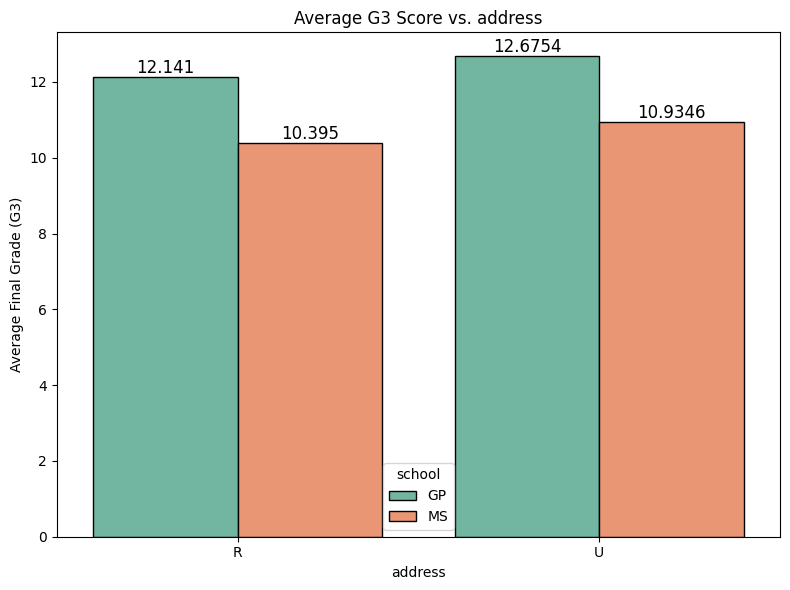

In [13]:
avg_g3_by_school_and_address = (
    df.groupby(["school", "address"])["G3"].mean().reset_index()
)
plot_average_g3_comparison(avg_g3_by_school_and_address, "address")

#### Q5. Do students who attended nursery school achieve higher final grades than those who did not ?

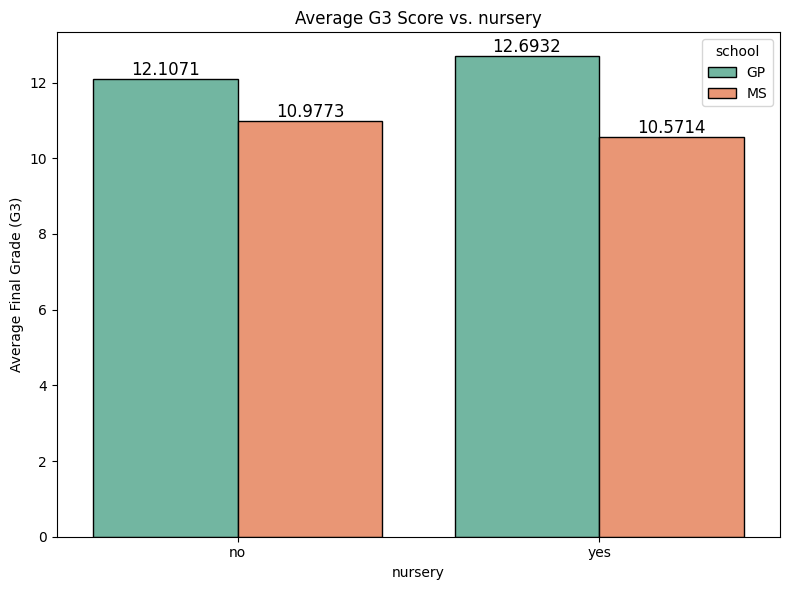

In [14]:
avg_g3_by_school_and_nursery = (
    df.groupby(["school", "nursery"])["G3"].mean().reset_index()
)
plot_average_g3_comparison(avg_g3_by_school_and_nursery, "nursery")

#### Q6. Does involvement in a romantic relationship influence students’ final grades ?

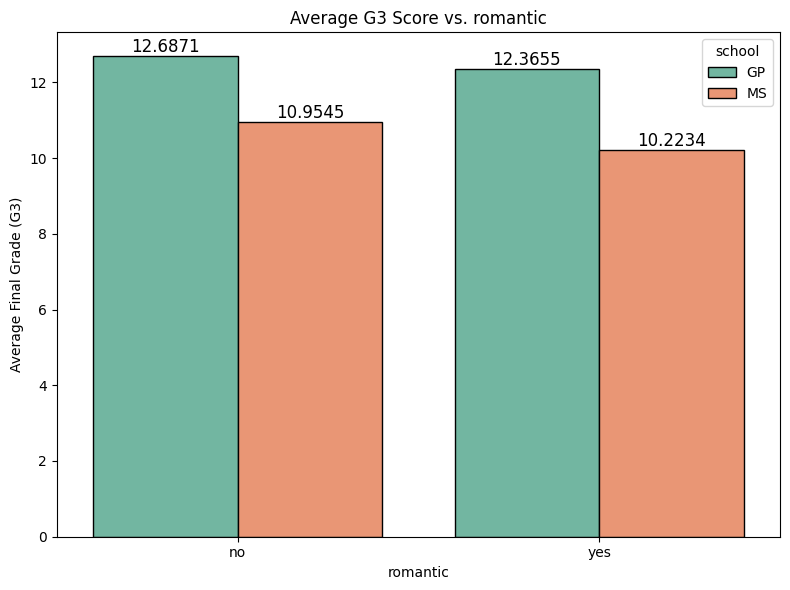

In [15]:
avg_g3_by_school_and_romantic = (
    df.groupby(["school", "romantic"])["G3"].mean().reset_index()
)
plot_average_g3_comparison(avg_g3_by_school_and_romantic, "romantic")

## 4. Data Preprocessing
### Handling Categorical Features
Although some of the features have already been pre-encoded, most of the categorical features need to be processed for predictive models.

Encoding Categorical Features:
- **school**: One-Hot Encoding
- **sex**: One-Hot Encoding
- **address**: One-Hot Encoding
- **famsize**: One-Hot Encoding
- **Pstatus**: One-Hot Encoding
- **Mjob**: Label Encoding
- **Fjob**: Label Encoding
- **reason**: Label Encoding
- **guardian**: Label Encoding

- **schoolsup**: Binary Label Encoding
- **famsup**: Binary Label Encoding
- **paid**: Binary Label Encoding
- **activities**: Binary Label Encoding
- **nursery**: Binary Label Encoding
- **higher**: Binary Label Encoding
- **internet**: Binary Label Encoding
- **romantic**: Binary Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

df = pd.get_dummies(df, columns=["school", "sex", "address", "famsize", "Pstatus"])
columns_to_label_encode = ["Mjob", "Fjob", "reason", "guardian"]
columns_to_binary_label_encode = [
    "schoolsup",
    "famsup",
    "paid",
    "activities",
    "nursery",
    "higher",
    "internet",
    "romantic",
]
for col in columns_to_label_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
for col in columns_to_binary_label_encode:
    df[col] = df[col].map({"yes": 1, "no": 0})

In [17]:
df.head()

,age,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,...,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T
0,18,4,4,0,4,0,1,2,2,0,...,True,False,True,False,False,True,True,False,True,False
1,17,1,1,0,2,0,0,1,2,0,...,True,False,True,False,False,True,True,False,False,True
2,15,1,1,0,2,2,1,1,2,0,...,True,False,True,False,False,True,False,True,False,True
3,15,4,2,1,3,1,1,1,3,0,...,True,False,True,False,False,True,True,False,False,True
4,16,3,3,2,2,1,0,1,2,0,...,True,False,True,False,False,True,True,False,False,True


## 5. Predictive Modelling
For this regression tasks, three regressors will be compared for evaluation:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Random Forest Regressor
- XGBoost Regressor

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=["G3"])
y = df["G3"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Standardisation
Some machine learning models, such as Linear Regression (especially with regularisation), K-Nearest Neighbours (KNN), and Support Vector Machines (SVM), are sensitive to the scale of input features because they compute distances or rely on dot products. Therefore, feature scaling is essential to ensure fair contribution of each feature and to avoid biased results.

Standardisation is generally preferred for most algorithms when features are normally distributed or when using regularised models. Normalisation would be useful if the data are not Gaussian or when we want all features strictly in the same range (e.g., for neural networks)

- Scale all numerical features (including boolean features).
- Always fit the scaler **only on training features** (X_train) and use it to transform test features (X_test).
- `.fit_transform(X_train)` and `.transform(X_test)`
- Do not scale the target variable unless there is a specific reason.
    - If the target variable needs to be scaled, invert the transformation before interpreting results.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

### Hyperparameter Tuning
Optimisation of hyperparameters is essential to obtain the best performance from Ridge Regression, Lasso Regression, XGBoost and Random Forest models. **Grid Search** or **Random Search** is typically used to find the best hyperparameters.

The scikit-learn library provides **GridSearchCV** and **RandomizedSearchCV** functions widely used for grid and random search with cross-validation.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [22]:
n_cv = 5
scoring_metric = "neg_root_mean_squared_error"
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

ridge_cv = RidgeCV(alphas=alphas, cv=n_cv, scoring=scoring_metric)
ridge_cv.fit(X_train_scaled, y_train)
print("Optimal alpha for Ridge:", ridge_cv.alpha_)

lasso_cv = LassoCV(alphas=alphas, cv=n_cv, n_jobs=-1)
lasso_cv.fit(X_train_scaled, y_train)
print("Optimal alpha for Lasso:", lasso_cv.alpha_)

Optimal alpha for Ridge: 10.0
Optimal alpha for Lasso: 0.1


In [23]:
rf_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 3, 5, 7, 10],
    "max_features": [None, "sqrt", "log2"],
}

rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(
    rf, rf_param_grid, cv=n_cv, scoring=scoring_metric, n_jobs=-1
)
grid_search_rf.fit(X_train_scaled, y_train)
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

Best parameters for Random Forest: {'max_depth': 5, 'max_features': None, 'n_estimators': 200}


In [24]:
xgb_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.001, 0.01, 0.1, 0.2],
}

xgb = XGBRegressor(random_state=42)
grid_search_xgb = GridSearchCV(
    xgb, xgb_param_grid, cv=n_cv, scoring=scoring_metric, n_jobs=-1
)
grid_search_xgb.fit(X_train_scaled, y_train)
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")

Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


### Evaluation on Test Data

In [ ]:
def evaluate_regressor(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = round(mean_squared_error(y_test, y_pred), 4)
    rmse = round(np.sqrt(mse), 4)
    mae = round(mean_absolute_error(y_test, y_pred), 4)
    r2 = round(r2_score(y_test, y_pred), 4)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R-Squared": r2}

In [ ]:
best_model_rf = grid_search_rf.best_estimator_
best_model_xgb = grid_search_xgb.best_estimator_

lr_results = evaluate_regressor(lr, X_test_scaled, y_test)
ridge_results = evaluate_regressor(ridge_cv, X_test_scaled, y_test)
lasso_results = evaluate_regressor(lasso_cv, X_test_scaled, y_test)
rf_results = evaluate_regressor(best_model_rf, X_test_scaled, y_test)
xgb_results = evaluate_regressor(best_model_xgb, X_test_scaled, y_test)

In [30]:
results_df = pd.DataFrame(
    [lr_results, ridge_results, lasso_results, rf_results, xgb_results],
    index=[
        "Linear Regression",
        "Ridge Regression (L2)",
        "Lasso Regression (L1)",
        "Random Forest",
        "XGBoost",
    ],
)
print(results_df)

                          MSE    RMSE     MAE  R-Squared
Linear Regression      1.4371  1.1988  0.7554     0.8526
Ridge Regression (L2)  1.4338  1.1974  0.7535     0.8530
Lasso Regression (L1)  1.3310  1.1537  0.7172     0.8635
Random Forest          1.4972  1.2236  0.7225     0.8465
XGBoost                1.4964  1.2233  0.7176     0.8466


## 6. Conclusion
A comparative analysis of five different preditive models applied to the dataset of academic performance in secondary education from two Portuguese schools yields the following key insights:


- Lasso Regression (L1) provides the best performance result in predictions with R-Squared value of $0.8635$, indicating that the model explains about $86$% of the variance in the target variable.
- This result is considered very strong for most real-world educational datasets, where student performance can be influenced by a large number of unmeasured factors, not just by IQ or study time.
- However, all models including both linear and tree-based algorithms, yield similar and strong results, suggesting that the feature set is informative and the preprocessing is appropriate.